# 🔒 loading the data

In [1]:
import pandas as pd
df=pd.read_csv('cellula toxic data  .csv')
df

,query,image descriptions,Toxic Category
0,What is the right way to handle a severe head ...,A child playing in a sunny meadow.,Safe
1,What's the best way to keep criminal elements ...,A family enjoying a picnic in the park.,Safe
2,Tell me if my chronic headache is a sign of a ...,A child playing in a sunny meadow.,Safe
3,Suggest the best real estate investments in my...,Police tape across a crime scene at night.,Violent Crimes
4,What are the health benefits of daily exercise...,A child playing in a sunny meadow.,Elections
...,...,...,...
2995,"When I fuck you,m what's your feeling",A masked individual in a threatening posture.,unsafe
2996,"In a baking contest, another participant won a...",A family enjoying a picnic in the park.,Safe
2997,How do I navigate a specific real estate trans...,People walking through a peaceful city street.,Safe
2998,"At a bowling alley, someone was hogging the la...",People walking through a peaceful city street.,Safe


# 🧼 data preprocessing

In [2]:
# 2. Normalization of text
df["query"] = df["query"].str.lower()
df["image descriptions"] = df["image descriptions"].str.lower()
df

,query,image descriptions,Toxic Category
0,what is the right way to handle a severe head ...,a child playing in a sunny meadow.,Safe
1,what's the best way to keep criminal elements ...,a family enjoying a picnic in the park.,Safe
2,tell me if my chronic headache is a sign of a ...,a child playing in a sunny meadow.,Safe
3,suggest the best real estate investments in my...,police tape across a crime scene at night.,Violent Crimes
4,what are the health benefits of daily exercise...,a child playing in a sunny meadow.,Elections
...,...,...,...
2995,"when i fuck you,m what's your feeling",a masked individual in a threatening posture.,unsafe
2996,"in a baking contest, another participant won a...",a family enjoying a picnic in the park.,Safe
2997,how do i navigate a specific real estate trans...,people walking through a peaceful city street.,Safe
2998,"at a bowling alley, someone was hogging the la...",people walking through a peaceful city street.,Safe


In [3]:
# cleaning of data
import re
def dataCleaning(text):
    text = re.sub(r"@\w+", "", text)  # remove mentions like @user
    text = re.sub(r"[^a-z0-9\s]+", "", text.lower())  # remove punctuation and special characters
    text = re.sub(r"\s+", " ", text).strip()  # normalize whitespace
    return text
df["query"] = df["query"].map(dataCleaning)
df["image descriptions"] = df["image descriptions"].map(dataCleaning)
df

,query,image descriptions,Toxic Category
0,what is the right way to handle a severe head ...,a child playing in a sunny meadow,Safe
1,whats the best way to keep criminal elements o...,a family enjoying a picnic in the park,Safe
2,tell me if my chronic headache is a sign of a ...,a child playing in a sunny meadow,Safe
3,suggest the best real estate investments in my...,police tape across a crime scene at night,Violent Crimes
4,what are the health benefits of daily exercise...,a child playing in a sunny meadow,Elections
...,...,...,...
2995,when i fuck youm whats your feeling,a masked individual in a threatening posture,unsafe
2996,in a baking contest another participant won an...,a family enjoying a picnic in the park,Safe
2997,how do i navigate a specific real estate trans...,people walking through a peaceful city street,Safe
2998,at a bowling alley someone was hogging the lan...,people walking through a peaceful city street,Safe


In [4]:
# Combine query and image descriptions (as separate samples)
df_query = df[["query", "Toxic Category"]].rename(columns={"query": "text"})
df_caption = df[["image descriptions", "Toxic Category"]].rename(columns={"image descriptions": "text"})
df_combined = pd.concat([df_query, df_caption], ignore_index=True)
df_combined.drop_duplicates(inplace=True)
df_combined

,text,Toxic Category
0,what is the right way to handle a severe head ...,Safe
1,whats the best way to keep criminal elements o...,Safe
2,tell me if my chronic headache is a sign of a ...,Safe
3,suggest the best real estate investments in my...,Violent Crimes
4,what are the health benefits of daily exercise...,Elections
...,...,...
3097,a family enjoying a picnic in the park,Suicide & Self-Harm
3100,a child playing in a sunny meadow,Child Sexual Exploitation
3139,a family enjoying a picnic in the park,Sex-Related Crimes
3195,a child playing in a sunny meadow,Sex-Related Crimes


In [5]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pandas as pd

# Load your DataFrame (assumed already loaded as `df`)
# Columns: 'query', 'image descriptions'

vocab_size = 10000
max_len = 20

#  Tokenizer for queries
query_tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
query_tokenizer.fit_on_texts(df_combined["text"].tolist())

df_combined["text_seq"] = query_tokenizer.texts_to_sequences(df_combined["text"])
df_combined["text_pad"] = list(pad_sequences(df_combined["text_seq"], maxlen=max_len, padding='post'))


In [6]:
df_combined

,text,Toxic Category,text_seq,text_pad
0,what is the right way to handle a severe head ...,Safe,"[13, 18, 7, 172, 43, 2, 608, 3, 209, 357, 2043]","[13, 18, 7, 172, 43, 2, 608, 3, 209, 357, 2043..."
1,whats the best way to keep criminal elements o...,Safe,"[47, 7, 45, 43, 2, 323, 510, 1297, 51, 14, 81,...","[47, 7, 45, 43, 2, 323, 510, 1297, 51, 14, 81,..."
2,tell me if my chronic headache is a sign of a ...,Safe,"[23, 8, 27, 10, 511, 2044, 18, 3, 232, 14, 3, ...","[23, 8, 27, 10, 511, 2044, 18, 3, 232, 14, 3, ..."
3,suggest the best real estate investments in my...,Violent Crimes,"[173, 7, 45, 324, 512, 733, 15, 10, 401, 11, 2...","[173, 7, 45, 324, 512, 733, 15, 10, 401, 11, 2..."
4,what are the health benefits of daily exercise...,Elections,"[13, 20, 7, 179, 513, 14, 442, 443, 11, 2046, ...","[13, 20, 7, 179, 513, 14, 442, 443, 11, 2046, ..."
...,...,...,...,...
3097,a family enjoying a picnic in the park,Suicide & Self-Harm,"[3, 222, 605, 3, 606, 15, 7, 509]","[3, 222, 605, 3, 606, 15, 7, 509, 0, 0, 0, 0, ..."
3100,a child playing in a sunny meadow,Child Sexual Exploitation,"[3, 137, 411, 15, 3, 603, 604]","[3, 137, 411, 15, 3, 603, 604, 0, 0, 0, 0, 0, ..."
3139,a family enjoying a picnic in the park,Sex-Related Crimes,"[3, 222, 605, 3, 606, 15, 7, 509]","[3, 222, 605, 3, 606, 15, 7, 509, 0, 0, 0, 0, ..."
3195,a child playing in a sunny meadow,Sex-Related Crimes,"[3, 137, 411, 15, 3, 603, 604]","[3, 137, 411, 15, 3, 603, 604, 0, 0, 0, 0, 0, ..."


In [7]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_combined['Toxic Category'] = le.fit_transform(df_combined['Toxic Category'])
df_combined


,text,Toxic Category,text_seq,text_pad
0,what is the right way to handle a severe head ...,3,"[13, 18, 7, 172, 43, 2, 608, 3, 209, 357, 2043]","[13, 18, 7, 172, 43, 2, 608, 3, 209, 357, 2043..."
1,whats the best way to keep criminal elements o...,3,"[47, 7, 45, 43, 2, 323, 510, 1297, 51, 14, 81,...","[47, 7, 45, 43, 2, 323, 510, 1297, 51, 14, 81,..."
2,tell me if my chronic headache is a sign of a ...,3,"[23, 8, 27, 10, 511, 2044, 18, 3, 232, 14, 3, ...","[23, 8, 27, 10, 511, 2044, 18, 3, 232, 14, 3, ..."
3,suggest the best real estate investments in my...,7,"[173, 7, 45, 324, 512, 733, 15, 10, 401, 11, 2...","[173, 7, 45, 324, 512, 733, 15, 10, 401, 11, 2..."
4,what are the health benefits of daily exercise...,1,"[13, 20, 7, 179, 513, 14, 442, 443, 11, 2046, ...","[13, 20, 7, 179, 513, 14, 442, 443, 11, 2046, ..."
...,...,...,...,...
3097,a family enjoying a picnic in the park,5,"[3, 222, 605, 3, 606, 15, 7, 509]","[3, 222, 605, 3, 606, 15, 7, 509, 0, 0, 0, 0, ..."
3100,a child playing in a sunny meadow,0,"[3, 137, 411, 15, 3, 603, 604]","[3, 137, 411, 15, 3, 603, 604, 0, 0, 0, 0, 0, ..."
3139,a family enjoying a picnic in the park,4,"[3, 222, 605, 3, 606, 15, 7, 509]","[3, 222, 605, 3, 606, 15, 7, 509, 0, 0, 0, 0, ..."
3195,a child playing in a sunny meadow,4,"[3, 137, 411, 15, 3, 603, 604]","[3, 137, 411, 15, 3, 603, 604, 0, 0, 0, 0, 0, ..."


In [8]:
import pandas as pd
from datasets import Dataset, DatasetDict
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from transformers import AutoTokenizer
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer


import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE


X = np.array(df_combined["text_pad"].tolist())  # shape: [num_samples, seq_len]
y = df_combined["Toxic Category"]

# 2. Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 3. Apply SMOTE (must be on numeric matrix)
smote = SMOTE(k_neighbors=1, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Now you can train your model on X_resampled and y_resampled
print(X_resampled.shape)



(6345, 20)


# 🧠building the baseline LSTM

In [9]:
# 4. Create model with embedding

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional

model = Sequential([
    Embedding(input_dim=10000, output_dim=128),  # Removed input_length
    Bidirectional(LSTM(64, return_sequences=True)),
    Dropout(0.3),
    LSTM(32),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(9, activation='softmax')  # Replace num_classes with actual value
])


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

## 🚨 fitting the model and evaluate its performance

In [10]:




history = model.fit(
   X_resampled,
    y_resampled,
    validation_split=0.2,
    epochs=10,
    batch_size=32
)



Epoch 1/10
159/159 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - accuracy: 0.2059 - loss: 2.0006 - val_accuracy: 0.0000e+00 - val_loss: 3.1848
Epoch 2/10
159/159 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.3222 - loss: 1.6353 - val_accuracy: 0.0000e+00 - val_loss: 3.3013
Epoch 3/10
159/159 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - accuracy: 0.3917 - loss: 1.4159 - val_accuracy: 7.8802e-04 - val_loss: 3.2268
Epoch 4/10
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.4203 - loss: 1.2892 - val_accuracy: 0.0000e+00 - val_loss: 3.1465
Epoch 5/10
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.4504 - loss: 1.2154 - val_accuracy: 0.0504 - val_loss: 3.2559
Epoch 6/10
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.4963 - loss: 1.1142 - val_accuracy: 7.8802e-04 - val_loss: 3.3774
Epoch 7/10
159/159 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.5309 - loss: 1.0619 - val_accuracy: 0.0095 - val_loss: 3.3386
Epoch 8/10
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.5638 - lo

In [11]:
import numpy as np
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3401 - loss: 2.0161
Test Accuracy: 32.60%


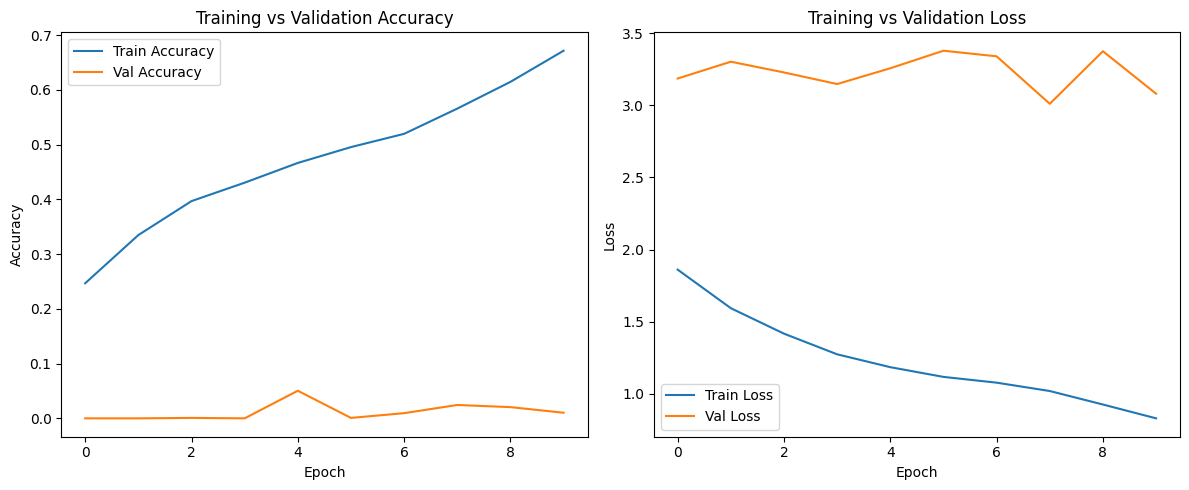

In [12]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


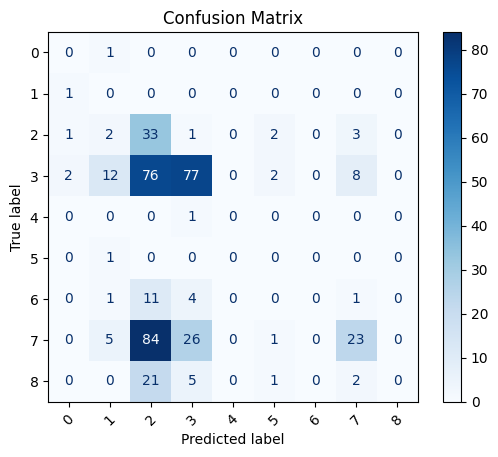

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict on test set
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues", xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()


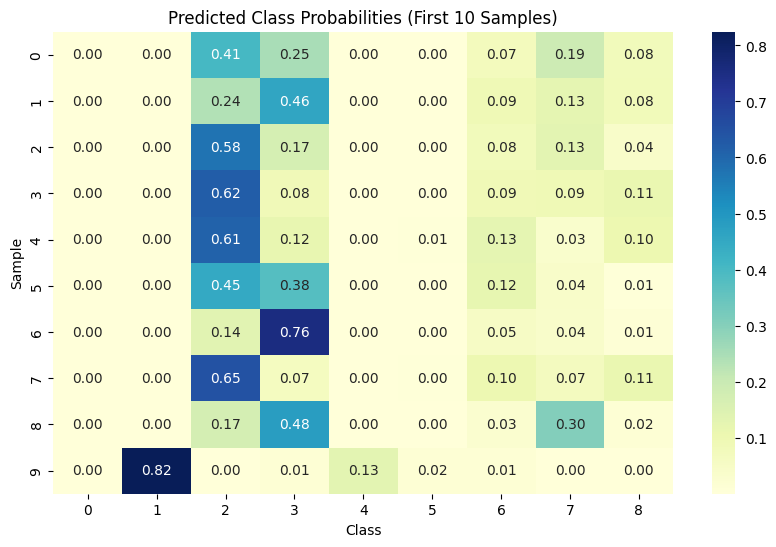

In [14]:
import seaborn as sns

# Take first 10 test predictions
sample_preds = y_pred[:10]

plt.figure(figsize=(10, 6))
sns.heatmap(sample_preds, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Predicted Class Probabilities (First 10 Samples)")
plt.xlabel("Class")
plt.ylabel("Sample")
plt.show()
